# Beschreibung der Aufgabe und Spalten des Datensatzes

Du arbeitest als Data Scientist in einem Start Up. Ihr habt vor einem Jahr euer Geschäft eröffnet und nun wollt ihr den nächsten Schritt gehen und eure Dienste erweitern. Euer Geschäftsmodell ist das Betreiben einer Plattform bei der sich Personen die eine Geschäftsidee haben, aber nicht das benötigte Geld, anmelden und für ihr Projekt innerhalb einer vorgegebenen Zeit Geld sammeln können. Auf der anderen Seite habt ihr Geldgeber, die gern ihr Geld in Projekte anlegen möchten und nach Investitionen suchen. Als Vermittler bringt eure Plattform also Geldnehmer und Geldgeber zusammen. Ihr verdient euer Geld mit einer Provision für jedes Projekt was auf eurer Plattform landet.

Deine Datenbasis ist die Historie eurer Plattform. Alle Projekte sind abgeschlossene Projekte, d.h. die Zeit, um für sein Projekt Geld zu sammeln ist abgelaufen. Euer Geschäftsmodell sieht es vor, dass die gesammelten Gelder ausgezahlt werden, auch wenn der Zielbetrag nicht erreicht wurde.

**In dem Datensatz gibt es KEINE Duplikate.**

**Der gesplittete Datensatz** enthält folgende Spalten (inkl. Bedeutung):


    - funded_amount ... mit Ablauf der Crowdfundingzeit erhaltener Betrag/ ausgezahlter Betrag in USD
    - loan_amount ... Zielbetrag (Betrag dem man mit Funding erreichen wollte) in USD
    - activity ... Unterkategory zu dem das Ziel des Crowdfunding thematisch gehört
    - sector ... Oberkategory in den das Crowdfunding Thema fällt
    - use ... Kurzbeschreibung wofür das Geld verwendet werden soll
    - country_code ... Ländercode nach ISO Norm
    - country ... Ländername nach ISO Norm
    - region ... Region
    - currency ... Währung in den der funded_amount dann ausgezahlt wurde
    - term in months ... Dauer über die der Kredit ausgezahlt werden soll
    - lender_count ...Darlehensgeber (also wieviele Personen Geld für das Projekt gegeben haben)
    - borrower_genders ... Geschlecht und Anzahl der Darlehensnehmer, also diejenigen die das Crowdfundingprojekt                                  initiiert haben
    - repayment interval ... Rückzahlungsmodalitäten/-rhythmus
    

# Bibs einlesen

In [334]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from wordcloud import WordCloud, STOPWORDS

from os import path, getcwd
from PIL import Image
#puingwin fuer statistik


# Datensaetze einlesen und verbinden

In [689]:
df1 = pd.read_csv('part1.csv', index_col=0)
df1.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet


In [690]:
df2 = pd.read_csv('part2.csv', sep='#', index_col=0)
df2.head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,175.0,175.0,Liquor Store / Off-License,Food,to purchase additional stock of coconut wine t...,PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular
1,325.0,325.0,Livestock,Agriculture,to buy 3 zebus and food to fatten them up.,MG,Madagascar,Antsirabe,MGA,12.0,13,female,monthly
2,550.0,550.0,Food Stall,Food,to buy ingredients for her food-vending busine...,PH,Philippines,"Cordova, Cebu",PHP,5.0,6,female,irregular


In [691]:
print(f'1.Datensatz - {df1.shape}, \n2.Datensatz - {df2.shape} \n')
print(f'Der neue Datensatz soll {df1.shape[0]+df2.shape[0]} Zeilen und {df1.shape[1]} Spalten haben')

1.Datensatz - (335000, 13), 
2.Datensatz - (336205, 13) 

Der neue Datensatz soll 671205 Zeilen und 13 Spalten haben


In [692]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
print(f'Der neue Datansatz hat nach der Verbindung - {df.shape[0]} Zeilen, {df.shape[1]} Spalten')

Der neue Datansatz hat nach der Verbindung - 671205 Zeilen, 13 Spalten


In [693]:
del df1
del df2

# Preprocessing

## Datentypen, Anzahl der unique Werten,  Null-Werten

In [694]:
pd.concat([df.dtypes, df.nunique(), df.isnull().sum(), round(df.isnull().sum()/df.shape[0]*100,2)], axis=1).\
   rename(columns={0:'dtypes',1:'nunique',2:'isnull',3:'isnull,%'})

,dtypes,nunique,isnull,"isnull,%"
funded_amount,float64,610,0,0.00
loan_amount,float64,479,0,0.00
activity,object,163,0,0.00
sector,object,15,0,0.00
use,object,424912,4232,0.63
country_code,object,86,8,0.00
country,object,87,0,0.00
region,object,12695,56800,8.46
currency,object,67,0,0.00
term_in_months,float64,148,0,0.00


### Spalte :: country_code 

Welche Länder haben keinen country_code?

In [695]:
df.loc[df['country_code'].isnull(),'country'].unique()

array(['Namibia'], dtype=object)

<font color='red'>Nach ISO hat Namibia 'NA' country code.</font>

In [696]:
# Ersetzen Null-Werte durch 'NA'
df['country_code'].fillna('NA', inplace=True)

#Prüfung des Ergebnisses
df['country_code'].isnull().sum()

0

### Spalte :: region  

Welche Länder haben einen Nullwert in der Spalte "region"?

In [697]:
df.loc[df['region'].isnull(),'country'].unique()

array(['Kenya', 'El Salvador', 'Senegal', 'Iraq', 'United States', 'Peru',
       'Tanzania', 'Guatemala', 'Colombia', 'Indonesia', 'Kosovo',
       'Timor-Leste', 'Turkey', 'Philippines', 'Palestine', 'Burundi',
       'Tajikistan', 'Honduras', 'Jordan', 'Mexico', 'Lebanon', 'Albania',
       'Nicaragua', 'Bolivia', 'Israel', 'Rwanda', 'Azerbaijan',
       'Ecuador', 'Mongolia', 'Haiti', 'Cambodia', 'Sierra Leone',
       'Yemen', 'Zimbabwe', 'Paraguay', 'Uganda', 'Armenia',
       'Dominican Republic', 'Benin', 'Belize', 'Ghana', 'Mozambique',
       'Zambia', 'Samoa', 'Brazil', 'Panama', 'Pakistan', 'Burkina Faso',
       'Suriname', 'Virgin Islands', 'Togo', 'South Africa', 'Malawi',
       'Nigeria', 'Liberia', 'Vietnam', 'Costa Rica', 'Guam',
       'Myanmar (Burma)', 'Mali', 'Madagascar',
       'The Democratic Republic of the Congo', 'Cameroon', 'Georgia',
       'Puerto Rico', 'South Sudan', 'Moldova', 'Chile', 'Kyrgyzstan',
       'India', 'China', 'Bhutan'], dtype=object)

Die Spalte "Region" ist für die weitere Analyse nicht von Nutzen, so dass wir sie einfach löschen.

In [698]:
df.drop('region', axis=1, inplace=True)

In [699]:
# Prüfung des Ergebnisses
print(df.shape)
df.columns

(671205, 12)


Index(['funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'currency', 'term_in_months', 'lender_count',
       'borrower_genders', 'repayment_interval'],
      dtype='object')

### Spalte :: use 

Da wir diese Spalte für die weitere Textanalyse benötigen, behalten wir sie bei, löschen aber die Zeilen mit Nullwerten.

In [700]:
df.dropna(subset=['use'], inplace=True)

In [701]:
# Prüfung des Ergebnisses
df['use'].isnull().sum()

0

### Spalte :: borrower_genders

Da diese Spalte für die weitere Analyse sehr wichtig, behalten wir sie bei, löschen aber die Zeilen mit Nullwerten.

In [702]:
df.dropna(subset=['borrower_genders'], inplace=True)

In [703]:
# Prüfung des Ergebnisses
df['borrower_genders'].isnull().sum()

0

### Prüfung, ob es schon keine systemische Null-Werte gibt

In [704]:
df.isnull().sum()

funded_amount         0
loan_amount           0
activity              0
sector                0
use                   0
country_code          0
country               0
currency              0
term_in_months        0
lender_count          0
borrower_genders      0
repayment_interval    0
dtype: int64

### Prufueng auf Synonyme

In [705]:
df_uniq = df.nunique().to_frame().rename(columns={0:'Anzahl'})
df_uniq = df_uniq.loc[df_uniq['Anzahl']<=100,:]

In [706]:
for name in df_uniq.index.values:
    print(name)
    print(np.sort(df[name].unique()),'\n')


sector
['Agriculture' 'Arts' 'Clothing' 'Construction' 'Education'
 'Entertainment' 'Food' 'Health' 'Housing' 'Manufacturing' 'Personal Use'
 'Retail' 'Services' 'Transportation' 'Wholesale'] 

country_code
['AF' 'AL' 'AM' 'AZ' 'BF' 'BI' 'BJ' 'BO' 'BR' 'BT' 'BZ' 'CD' 'CG' 'CI'
 'CL' 'CM' 'CN' 'CO' 'CR' 'DO' 'EC' 'EG' 'GE' 'GH' 'GT' 'GU' 'HN' 'HT'
 'ID' 'IL' 'IN' 'IQ' 'JO' 'KE' 'KG' 'KH' 'LA' 'LB' 'LR' 'LS' 'MD' 'MG'
 'ML' 'MM' 'MN' 'MR' 'MW' 'MX' 'MZ' 'NA' 'NG' 'NI' 'NP' 'PA' 'PE' 'PH'
 'PK' 'PR' 'PS' 'PY' 'RW' 'SB' 'SL' 'SN' 'SO' 'SR' 'SS' 'SV' 'TG' 'TH'
 'TJ' 'TL' 'TR' 'TZ' 'UA' 'UG' 'US' 'VC' 'VI' 'VN' 'VU' 'WS' 'XK' 'YE'
 'ZA' 'ZM' 'ZW'] 

country
['Afghanistan' 'Albania' 'Armenia' 'Azerbaijan' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Brazil' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Chile'
 'China' 'Colombia' 'Congo' 'Costa Rica' "Cote D'Ivoire"
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Georgia' 'Ghana'
 'Guam' 'Guatemala' 'Haiti' 'Honduras' 'India' 'Indonesia' 'Ir

Es gibt keine Synonyme.

### Prüfung auf Synonyme in den numerischen Spalten

In [707]:
df.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,666973.000000,666973.000000,666973.000000,666973.000000
mean,785.132682,840.273669,13.730220,20.551075
std,1128.005214,1187.874896,8.596183,28.366371
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


Es werden keine unmöglichen Werte (negativ oder sehr hoch) beobachtet.

# Neue Features erstellen

## Spalte ::  borrower_genders

### Umwandlung in eine Liste

Die Spalte borrower_genders enthält Geschlecht und Anzahl der Personen. Da diese Spalte ein Object ist, müssen wir diese Daten in eine  Liste umwandeln, um die Anzahl der Personen zu berechnen und ihr Geschlecht zu analysieren.

In [708]:
borrower_genders_liste = df['borrower_genders'].apply(lambda x: x.replace(",","").split())

In [709]:
# Prüfung des Ergebnisses

borrower_genders_liste

0                 [female]
1         [female, female]
2                 [female]
3                 [female]
4                 [female]
                ...       
671199            [female]
671200            [female]
671201            [female]
671203            [female]
671204            [female]
Name: borrower_genders, Length: 666973, dtype: object

In [710]:
df['borrower_genders'] = borrower_genders_liste

## Neue Spalte :: borrower_count

In [711]:
df['borrower_count'] = df['borrower_genders'].apply(lambda x: len(x))

In [712]:
df.loc[df['borrower_count']==4,['borrower_genders','borrower_count']].head(5)

,borrower_genders,borrower_count
59,"[male, female, female, female]",4
78,"[female, female, female, female]",4
97,"[male, female, male, male]",4
101,"[female, female, female, female]",4
216,"[male, female, female, female]",4


## Neue Spalte :: female_borrowers_count, male_borrowers_count

In [713]:
def count_gender(liste):
    count = 0
    for elem in liste:
        if elem == 'female':
            count += 1
    return count

df['female_borrowers_count'] = df['borrower_genders'].apply(lambda x: count_gender(x))

In [714]:
def count_gender(liste):
    count = 0
    for elem in liste:
        if elem == 'male':
            count += 1
    return count

df['male_borrowers_count'] = df['borrower_genders'].apply(lambda x: count_gender(x))

In [715]:
df.loc[df['female_borrowers_count']==2, ['borrower_genders','female_borrowers_count','male_borrowers_count']].head(3) 

,borrower_genders,female_borrowers_count,male_borrowers_count
1,"[female, female]",2,0
22,"[female, female]",2,0
194,"[male, female, female, male, male, male, male]",2,5


In [716]:
df.drop('borrower_genders', axis=1, inplace=True)

## Neue Spalte :: successful_loan

Da nicht allen Anträgen entsprochen wurde, führen wir eine neue Spalte ein, die es uns ermöglicht, die Darlehen in erfolgreiche und erfolglose einzuteilen.

In [717]:
def success_loan(x,y):
    if (x-y) > 0:
        success = 'no'
    else:
        success = 'yes'
    return success

df['successful_loan'] = df.apply(lambda x: success_loan(x['loan_amount'], x['funded_amount']), axis=1)

In [718]:
df.loc[df['successful_loan']=='no',:].head(3)

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,repayment_interval,borrower_count,female_borrowers_count,male_borrowers_count,successful_loan
87,4275.0,5000.0,Personal Housing Expenses,Housing,"to pave the ground and repair the ceiling, to ...",PS,Palestine,USD,39.0,58,monthly,1,0,1,no
112,1925.0,2400.0,Electronics Repair,Services,to pay the annual rent for his shop,IQ,Iraq,USD,15.0,41,monthly,1,0,1,no
186,2625.0,3000.0,Grocery Store,Food,to pay the annual rent on his grocery store an...,IQ,Iraq,USD,15.0,72,monthly,1,0,1,no


# Speichernplatz optimieren

In [719]:
#zur besseren Visualisierung die Namen der Länder verkürzen 
df.country.unique()
df.loc[df['country']=='The Democratic Republic of the Congo','country']= 'Republic Congo'
df.loc[df['country']=='Saint Vincent and the Grenadines','country'] ='St Vincent Grenadines'
df.loc[df['country']== "Lao People's Democratic Republic",'country'] = 'Republic Lao'

## Datentypen umwalden

In [720]:
pd.concat([df.dtypes,df.nunique()], axis=1)#.rename(columns={0:'dtypes',1:'nunique'})

,0,1
funded_amount,float64,598
loan_amount,float64,476
activity,object,163
sector,object,15
use,object,424912
country_code,object,87
country,object,87
currency,object,67
term_in_months,float64,148
lender_count,int64,499


In [721]:
memory_before = df.memory_usage(deep=True).sum() 
memory_before

417563255

In [722]:
col_to_category = ['sector','repayment_interval','country','country_code','currency','successful_loan']
#col_to_category = ['repayment_interval','currency']
col_to_int =['term_in_months','lender_count','borrower_count','female_borrowers_count','male_borrowers_count']
col_to_float = ['funded_amount','loan_amount']

#an category type anpassen
df[col_to_category] = df[col_to_category].astype('category')

# downcast
df[col_to_int] = df[col_to_int].apply(pd.to_numeric, downcast='integer')
df[col_to_float] = df[col_to_float].apply(pd.to_numeric, downcast='float')

In [723]:
# Pruefung des Ergebnisses

df.dtypes

funded_amount              float32
loan_amount                float32
activity                    object
sector                    category
use                         object
country_code              category
country                   category
currency                  category
term_in_months               int16
lender_count                 int16
repayment_interval        category
borrower_count                int8
female_borrowers_count        int8
male_borrowers_count          int8
successful_loan           category
dtype: object

In [724]:
memory_after = df.memory_usage(deep=True).sum() 
memory_after

144891949

In [725]:
reduction = (memory_before-memory_after)/memory_before *100

print(f"reduction={reduction:0.2f}%")

reduction=65.30%


## Als pickle speichern

In [726]:
df.to_pickle('my_project')

# EDA

## Ausreisser

In [727]:
df = pd.read_pickle('my_project')

df.describe()

,funded_amount,loan_amount,term_in_months,lender_count,borrower_count,female_borrowers_count,male_borrowers_count
count,666973.000000,666973.000000,666973.000000,666973.000000,666973.000000,666973.000000,666973.000000
mean,784.730896,839.986877,13.730220,20.551075,2.018323,1.606170,0.412153
std,1128.017090,1187.972656,8.596183,28.366371,3.413483,3.040929,1.119498
min,0.000000,25.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000,1.000000,1.000000,0.000000
50%,450.000000,500.000000,13.000000,13.000000,1.000000,1.000000,0.000000
75%,900.000000,1000.000000,14.000000,24.000000,1.000000,1.000000,1.000000
max,100000.000000,100000.000000,158.000000,2986.000000,50.000000,50.000000,44.000000


Es fällt sofort auf, dass bei den Darlehensbeträgen der Mittelwert und das Maximum weit auseinander liegen und die Standardabweichung ein Mehrfaches des Medians beträgt. Es ist offensichtlich, dass es ein oder einiger Ausreißer gibt, die die zentralen Tendenzen stark beeinflussen. Daher muss eine Entscheidung getroffen werden, ob diese Daten für eine weitere Analyse beibehalten werden sollen.

Visualisieren Sie die Verteilung mithilfe eines Boxplots und eines Histogramms, um zu sehen, wie die Daten verteilt sind.

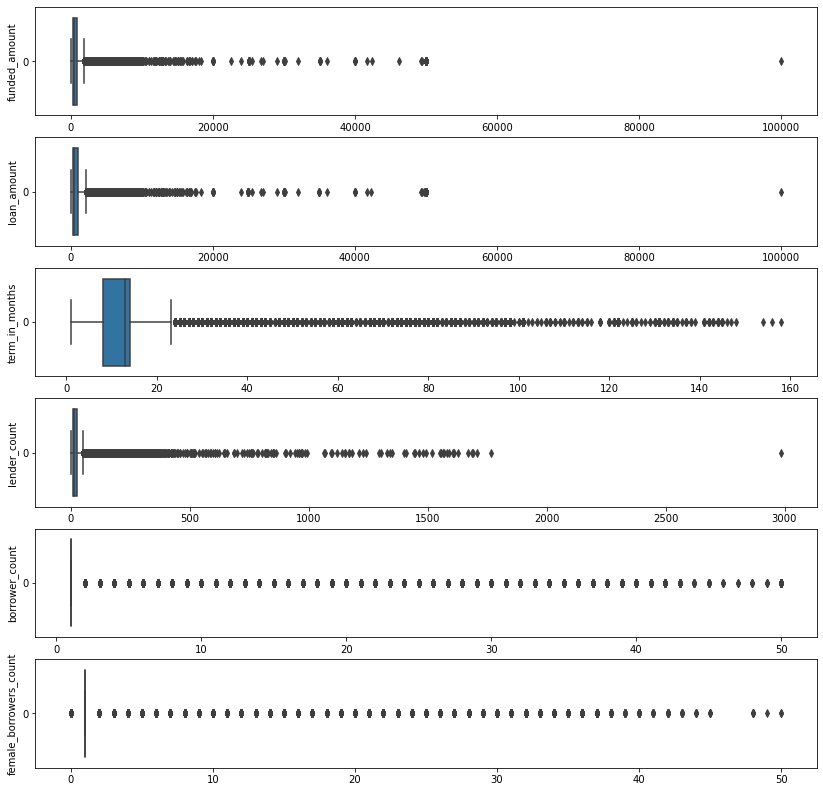

In [728]:
columns = df.describe().columns.to_list()


fig, axs = plt.subplots(6,1, figsize=(14,14))

for i, ax in enumerate(axs.flatten()):
    sns.boxplot(data=df[columns[i]], ax=ax, orient='h')
    ax.set_ylabel(columns[i])
    

Schauen wir uns die großen Werte bei **loan_amount und funded_amount** genauer an.

In [729]:
df.loc[df['loan_amount']>80000,:]

,funded_amount,loan_amount,activity,sector,use,country_code,country,currency,term_in_months,lender_count,repayment_interval,borrower_count,female_borrowers_count,male_borrowers_count,successful_loan
70499,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,USD,75,2986,irregular,1,1,0,yes


Dieses Projekt hat sowohl den größten Betrag als auch die größte Anzahl von Darlehensgebern. Dieses Projekt ist jedoch das einzige seiner Art und beeinträchtigt die Analyse erheblich, so dass wir es **aus dem Datensatz entfernen werden.**

In [730]:
print(f'Größe des Datensatzes vor der Löschung des Ausreißers {df.shape[0]}')

df.drop(index=70499, inplace=True)

print(f'Größe des Datensatzes nach der Löschung des Ausreißers {df.shape[0]}')

Größe des Datensatzes vor der Löschung des Ausreißers 666973
Größe des Datensatzes nach der Löschung des Ausreißers 666972


## Erste Fragen, um die Daten kennen zu lernen

### Wie viel Prozent der Kredite sind nicht erfolgreich?

Schauen wir uns zunächst an, wie erfolgreich unser Unternehmen im Hinblick auf die Kundenzufriedenheit ist. Wenn wir viele Kunden haben, die uns verlassen, ohne die gewünschten Ergebnisse zu erzielen, wirft dies ein schlechtes Licht auf die Zukunft unseres Unternehmens.

In [731]:
# Vorebereitung des Datensatzes

df_success = df.groupby('successful_loan', as_index=False).agg(Anzahl=('successful_loan','count'))
df_success

,successful_loan,Anzahl
0,no,47640
1,yes,619332


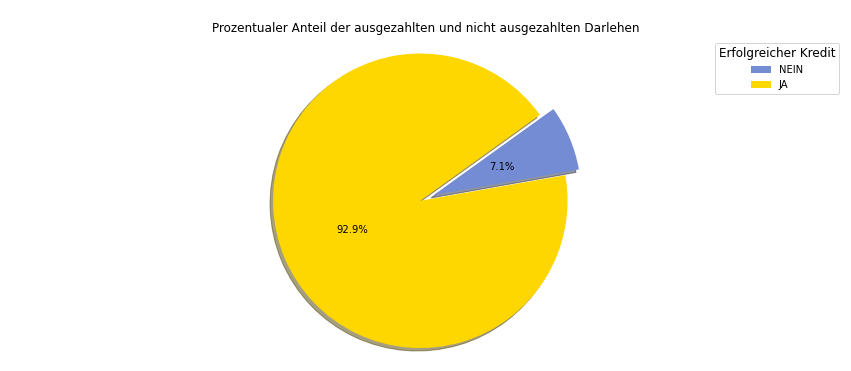

In [732]:
colors_list = ['#748cd4', 'gold']
labels = ['NEIN', 'JA']
explode_list = [0.1, 0] 

fig, ax = plt.subplots( figsize=(15, 6))
ax = df_success['Anzahl'].plot(kind='pie',
                         autopct='%0.1f%%', 
                         startangle=10,    
                         shadow=True,       
                         labels=None,         # turn off labels on pie chart
                         pctdistance=0.5,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                         colors=colors_list,  # add custom colors
                         explode=explode_list # 'explode' 
                
                    )
plt.axis('equal') 
plt.ylabel('')
plt.legend(labels=labels, loc='upper right', title='Erfolgreicher Kredit', title_fontsize='large')
plt.savefig('success_credit.png')   
ax.set_title('\nProzentualer Anteil der ausgezahlten und nicht ausgezahlten Darlehen');

Wir haben ein recht erfolgreiches Geschäftsmodell, unsere Kunden bekommen im Grunde das, was sie auf unserer Plattform suchen.

In [864]:
# fuer weitere Analyse
mask_yes_credit = df['successful_loan'] == 'yes'
mask_no_credit = df['successful_loan'] == 'no'

### Prozentualer Anteil der männlichen und weiblichen Kunden

In [734]:
#Vorbereitung des Datensatzes

df_gender= df[['female_borrowers_count','male_borrowers_count']].apply(np.sum, axis=0).to_frame().rename(columns={0:'Anzahl'})
df_gender

,Anzahl
female_borrowers_count,1071271
male_borrowers_count,274895


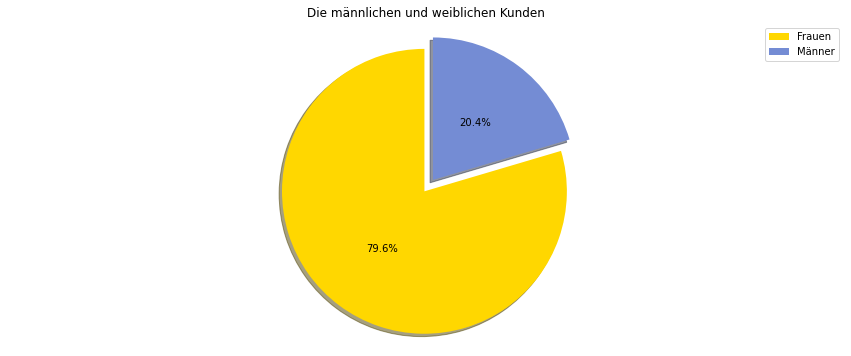

In [735]:
colors_list = ['gold', '#748cd4']
labels = ['Frauen', 'Männer']
explode_list = [0.1, 0] 

df_gender['Anzahl'].plot(kind='pie',
                         figsize=(15, 6),
                         autopct='%0.1f%%', 
                         startangle=90,    
                         shadow=True,       
                         labels=None,         # turn off labels on pie chart
                         pctdistance=0.5,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                         colors=colors_list,  # add custom colors
                         explode=explode_list # 'explode' lowest 3 continents
                    )
plt.axis('equal') 
plt.legend(labels=labels, loc='upper right')
plt.ylabel('')
plt.title('Die männlichen und weiblichen Kunden');


Unser Geschäft wird hauptsächlich von Frauen genutzt. In Anbetracht unserer geografischen Abdeckung kann davon ausgegangen werden, dass dies auf den mangelnden Zugang zu Kreditprogrammen für Frauen in ihren Ländern zurückzuführen ist.

#### Geschlechterverteilung nach Sektoren

In [736]:
df_gender_sector= df.groupby('sector', as_index=False).agg(Frauen=('female_borrowers_count','sum'), 
                                                           Maenner=('male_borrowers_count','sum'))

#df_gender_sector

In [737]:
# 
df_gender_sector['Frauen_pro_1000_Personen'] =  df_gender_sector['Frauen'].\
                                                div(df_gender_sector[['Frauen','Maenner']].sum(1))*1000

df_gender_sector['Maenner_pro_1000_Personen'] =  df_gender_sector['Maenner'].\
                                                div(df_gender_sector[['Frauen','Maenner']].sum(1))*1000

#df_gender_sector

In [738]:
df_gender_sector_melt = df_gender_sector.melt(id_vars='sector',
                                         value_vars=['Frauen_pro_1000_Personen','Maenner_pro_1000_Personen'], 
                                         var_name='Gender',
                                         value_name='Gender_count').sort_values(by='Gender_count', ascending=False)

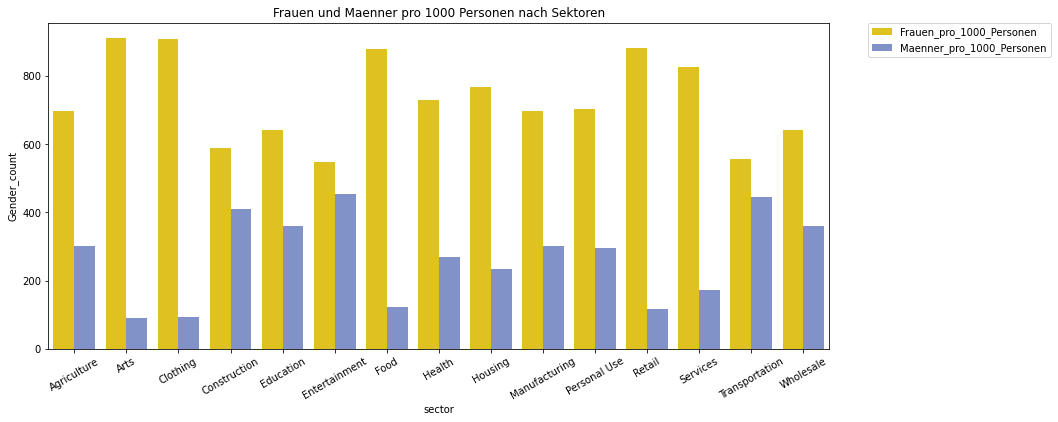

In [739]:
plt.figure(figsize=(14,6))

g = sns.barplot(data=df_gender_sector_melt, x='sector', y='Gender_count', hue='Gender', palette=colors_list)

g.set_title("Frauen und Maenner pro 1000 Personen nach Sektoren")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=30)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Es gibt jedoch auch Sektoren, in denen der Frauenanteil nicht so hoch ist.

####  Geschlechterverteilung nach Ländern

##### Wo beantragen Frauen häufiger einen Kredit als Männer?

In [740]:
df_gender_country= df.groupby('country', as_index=False).agg(Frauen=('female_borrowers_count','sum'), 
                                                           Maenner=('male_borrowers_count','sum'))

In [741]:
df_gender_country['Frauen_pro_1000_Personen'] =  df_gender_country['Frauen'].\
                                                div(df_gender_country[['Frauen','Maenner']].sum(1))*1000

df_gender_country['Maenner_pro_1000_Personen'] =  df_gender_country['Maenner'].\
                                                div(df_gender_country[['Frauen','Maenner']].sum(1))*1000

df_gender_country = df_gender_country.sort_values(by='Frauen_pro_1000_Personen',ascending=False).head(10)

#df_gender_country

In [742]:
#schmelzen, um eine Spalte für den Farbton (hue) zu erstellen
df_gender_country_melt = df_gender_country.melt(id_vars='country',
                                           value_vars=['Frauen_pro_1000_Personen','Maenner_pro_1000_Personen'], 
                                           var_name='Gender',
                                           value_name='Gender_count') 
df_gender_country_melt['country'] = df_gender_country_melt['country'].astype('string')
df_gender_country_melt.loc[df_gender_country_melt['country']=="Lao People's Democratic Republic",'country'] = 'Republic Lao'

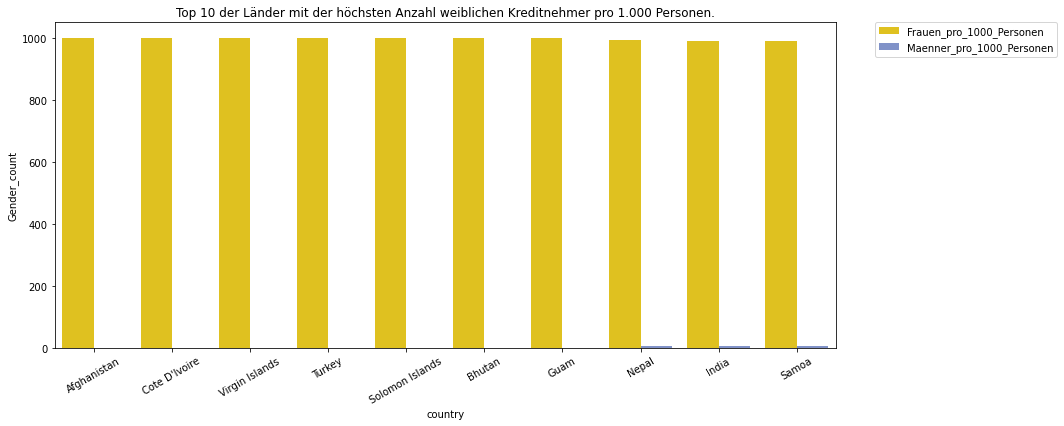

In [743]:
plt.figure(figsize=(14,6))

g = sns.barplot(data=df_gender_country_melt, x='country', y='Gender_count', hue='Gender', palette=colors_list)

g.set_title("Top 10 der Länder mit der höchsten Anzahl weiblichen Kreditnehmer pro 1.000 Personen.")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=30)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

##### Wo beantragen Maenner häufiger einen Kredit als Frauen?

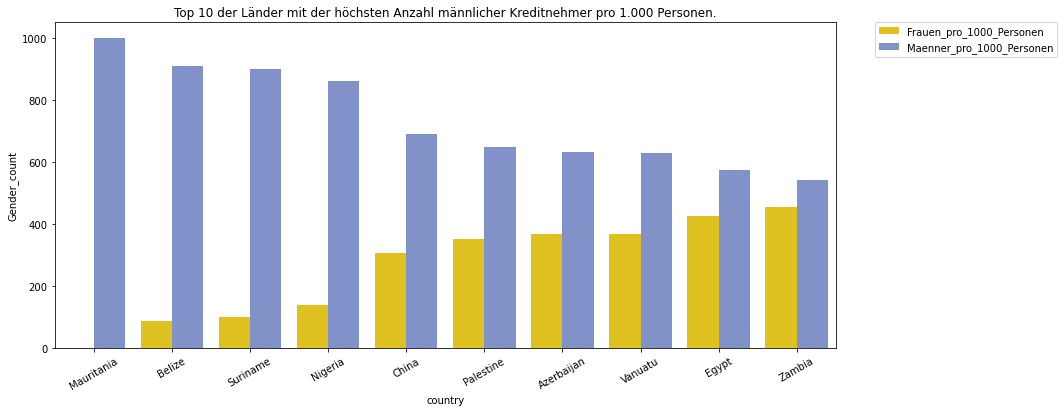

In [744]:
df_gender_country= df.groupby('country', as_index=False).agg(Frauen=('female_borrowers_count','sum'), 
                                                           Maenner=('male_borrowers_count','sum'))

df_gender_country['Frauen_pro_1000_Personen'] =  df_gender_country['Frauen'].\
                                                div(df_gender_country[['Frauen','Maenner']].sum(1))*1000

df_gender_country['Maenner_pro_1000_Personen'] =  df_gender_country['Maenner'].\
                                                div(df_gender_country[['Frauen','Maenner']].sum(1))*1000

df_gender_country = df_gender_country.sort_values(by='Maenner_pro_1000_Personen',ascending=False).head(10)

df_gender_country_melt = df_gender_country.melt(id_vars='country',
                                           value_vars=['Frauen_pro_1000_Personen','Maenner_pro_1000_Personen'], 
                                           var_name='Gender',
                                           value_name='Gender_count') 
df_gender_country_melt['country'] = df_gender_country_melt['country'].astype('string')

plt.figure(figsize=(14,6))

g = sns.barplot(data=df_gender_country_melt, x='country', y='Gender_count', hue='Gender', palette=colors_list)

g.set_title("Top 10 der Länder mit der höchsten Anzahl männlicher Kreditnehmer pro 1.000 Personen.")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=30)
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### Kreditnehmer - Gruppen oder Einzelpersonen?

In [853]:
#Vorbereitung des Datensatzes

df_borrower_count = df.groupby('borrower_count',as_index=False).\
                        agg(Anzahl=('borrower_count','count')).\
                        sort_values(by='Anzahl', ascending=False)

def to_others(x,y):
    if y > 5431:
        return x
    else:
        return 'mehr als 5 Personen'
    
df_borrower_count['gruppe'] = df_borrower_count.apply(lambda x: to_others(x['borrower_count'], x['Anzahl']), axis=1)
df_borrower_count = df_borrower_count.groupby('gruppe').agg(count=('Anzahl','sum'))
#df_borrower_count

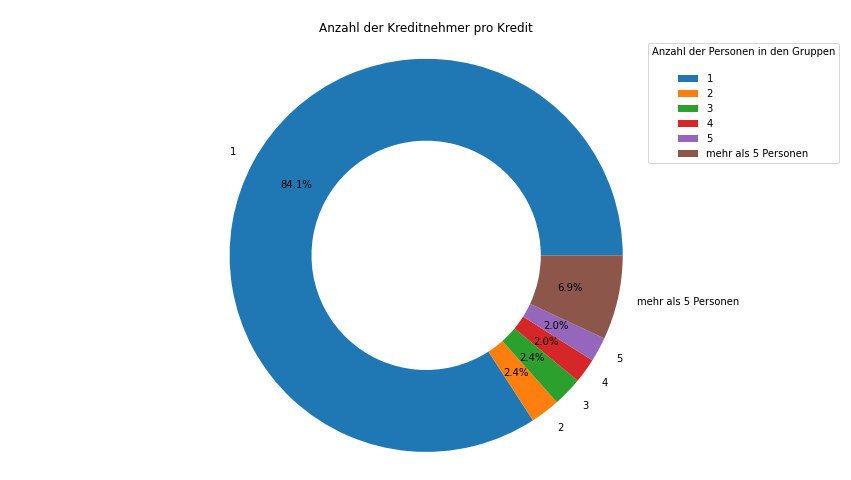

In [856]:
# Vizualisierung
#colors_list = ['coral', 'lightskyblue']
#colors_list = ['tomato', 'lightgreen']
explode_list = [0,0.05,0.05,0.05,0.05,0.05] # ratio for each continent with which to offset each wedge.

labels =df_borrower_count.index.to_list()

fig, ax = plt.subplots(figsize=[15,8])

ax.pie(df_borrower_count['count'], 
       radius=1.2,
      # colors=colors_list, 
       labels=labels,
      # explode=explode_list,
       startangle= 0,
       pctdistance=0.75,
       autopct='%1.1f%%',
       wedgeprops=dict(width=0.5))

plt.axis('equal') 
plt.legend(labels=labels, loc='upper right',title='Anzahl der Personen in den Gruppen\n')
plt.ylabel('')
plt.title('\nAnzahl der Kreditnehmer pro Kredit');


**Die überwiegende Mehrheit der Kreditantragsteller sind Einzelpersonen.**

### Woher kommen unsere Kunden?

In [888]:
# datensatz vorbereitung

df_map = df.loc[mask_yes_credit,:].groupby(['country_code','country'], as_index=False,observed=True).\
                                    agg(Anzahl_der_Kredite=("country",'count'),
                                        Credit_Amount=('loan_amount','sum')).\
                                   sort_values(by='Anzahl_der_Kredite', ascending=False)

df_map['Anzahl der Kredite,%'] = round(df_map['Anzahl_der_Kredite'].div(df_map['Anzahl_der_Kredite'].sum(0)) *100,2)
df_map['Umsatz,%'] = round(df_map['Credit_Amount'].div(df_map['Credit_Amount'].sum(0)) *100,2)

In [889]:
df_map

,country_code,country,Anzahl_der_Kredite,Credit_Amount,"Anzahl der Kredite,%","Umsatz,%"
6,PH,Philippines,157533,53547076.0,25.44,10.85
2,KE,Kenya,69846,30182950.0,11.28,6.12
9,KH,Cambodia,33437,18180100.0,5.40,3.68
4,SV,El Salvador,32260,19848000.0,5.21,4.02
0,PK,Pakistan,24918,11771650.0,4.02,2.39
...,...,...,...,...,...,...
67,VU,Vanuatu,4,9250.0,0.00,0.00
78,AF,Afghanistan,2,14000.0,0.00,0.00
66,MR,Mauritania,1,15000.0,0.00,0.00
83,CI,Cote D'Ivoire,1,50000.0,0.00,0.01


**Um die Daten auf einer Karte darzustellen, benötigen wir ISO-3 Code.**

In [890]:
iso_3 = pd.read_csv('wikipedia-iso-country-codes.csv')
iso_3.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [891]:
# Verbinden von Datensätzen

df_map = pd.merge(left=df_map,
                  right=iso_3[['Alpha-2 code','Alpha-3 code']],
                  how='left',
                  left_on='country_code',
                  right_on='Alpha-2 code')


In [895]:
# prüfen, ob alle Länder einen ISO-3-Code erhalten haben

df_map.loc[df_map['Alpha-3 code'].isnull(),:]

,country_code,country,Anzahl_der_Kredite,Credit_Amount,"Anzahl der Kredite,%","Umsatz,%",Alpha-2 code,Alpha-3 code
53,XK,Kosovo,1200,1564275.0,0.19,0.32,NaN,NaN
73,SS,South Sudan,124,104675.0,0.02,0.02,NaN,NaN
79,NA,Namibia,8,32375.0,0.00,0.01,NaN,NaN


In [896]:
# die fehlenden Codes manuell hinzufügen

df_map.loc[df_map['country']=="Kosovo",'Alpha-3 code'] == 'SRB'
df_map.loc[df_map['country']=="South Sudan",'Alpha-3 code'] == 'SSD'
df_map.loc[df_map['country']=="Namibia",'Alpha-3 code'] == 'NAM'

79    False
Name: Alpha-3 code, dtype: bool

In [898]:
map_count = px.choropleth(df_map, 
                    locations='Alpha-3 code',
                     hover_name="country", 
                     color='Anzahl der Kredite,%',
                     projection="natural earth")
map_count.layout.title.text = 'Anzahl der Kredite'

#map_count.write_image("map_count.png")
map_count.show()

In [899]:
map_umsatz = px.choropleth(df_map, 
                    locations='Alpha-3 code',
                     hover_name="country", 
                     color='Umsatz,%',
                     projection="natural earth")
map_umsatz.layout.title.text = 'Umsatz nach Ländern'

map_umsatz.show()

<font color='red'>**Es gibt ein großes Geschäftspotenzial. Wenn 24 % des Umsatzes in den Philippinen generiert werden, wird das Wachstum in anderen Ländern dem Unternehmen einen erheblichen Anstieg der Umsätze bringen.**</red>

In [868]:
#df_map_bar= df_map.head(20)
df_map
#sns.barplot(data=df_map_bar, x='country', y='Umsatz,%', color='#748cd4')

,country_code,country,Anzahl_der_Kredite,Credit_Amount,"Anzahl der Kredite,%","Umsatz,%"
6,PH,Philippines,157533,53547076.0,25.44,10.85
2,KE,Kenya,69846,30182950.0,11.28,6.12
9,KH,Cambodia,33437,18180100.0,5.40,3.68
4,SV,El Salvador,32260,19848000.0,5.21,4.02
0,PK,Pakistan,24918,11771650.0,4.02,2.39
...,...,...,...,...,...,...
67,VU,Vanuatu,4,9250.0,0.00,0.00
78,AF,Afghanistan,2,14000.0,0.00,0.00
66,MR,Mauritania,1,15000.0,0.00,0.00
83,CI,Cote D'Ivoire,1,50000.0,0.00,0.01


### Welcher Sektor hat die meisten Kreditanträge?

In [756]:
df_sector = df.groupby(['sector'], as_index=False, observed=True).agg(Summe_der_loan =('loan_amount','sum')).\
                sort_values(by='Summe_der_loan', ascending=False).head(10)
df_sector['sector'] = df_sector['sector'].astype('string') 

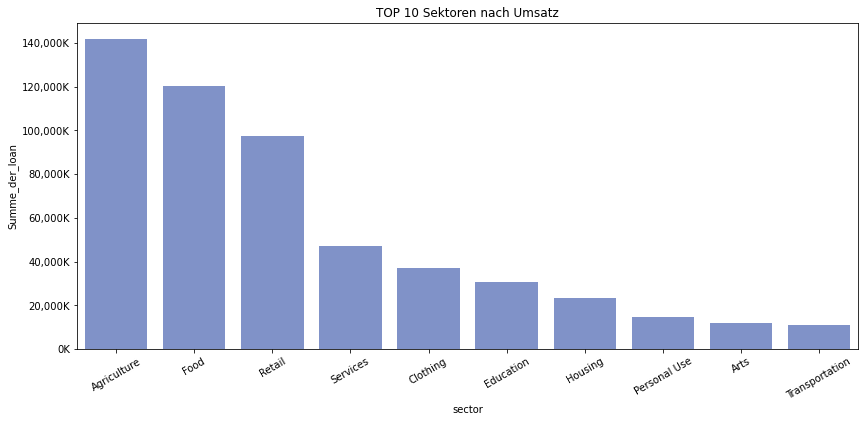

In [757]:
plt.figure(figsize=(14,6))

g = sns.barplot(data=df_sector, x='sector', y='Summe_der_loan', color='#748cd4')

g.set_title("TOP 10 Sektoren nach Umsatz")
g.set_xticklabels(labels=g.get_xticklabels(), rotation=30)

ylabel = ['{:,.0f}'.format(x) + 'K' for x in g.get_yticks()/1000]
g.set_yticklabels(ylabel);

## Kredite - Umsatz und Anzahl

### Boxplot und Histogramm

Schauen wir uns die Verteilung der Beträge an.

Text(0, 0.5, 'funded_amount')

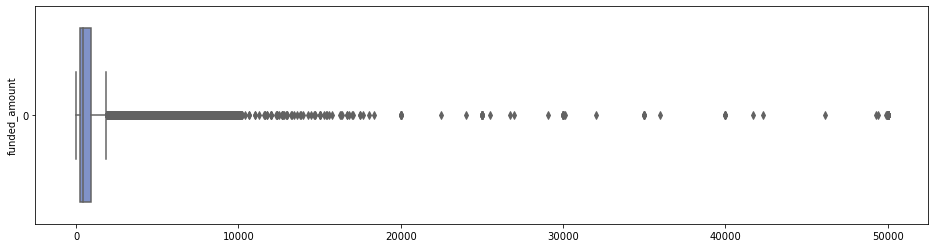

In [758]:
plt.figure(figsize=(16,4))
g= sns.boxplot(data=df['funded_amount'], orient='h', color='#748cd4')
g.set_ylabel('funded_amount')

Wie es oft bei Geldbeträgen der Fall ist, ist diese Verteilung rechtsschief. <br>
Schauen wir uns die am häufigsten  Beträge an. Aus Gründen der besseren Übersichtlichkeit werden wir das Spektrum der Beträge verkürzen.

In [759]:
percentil_90 = np.quantile(df['loan_amount'], 0.90)
mask_90perc = df['loan_amount'] <= percentil_90

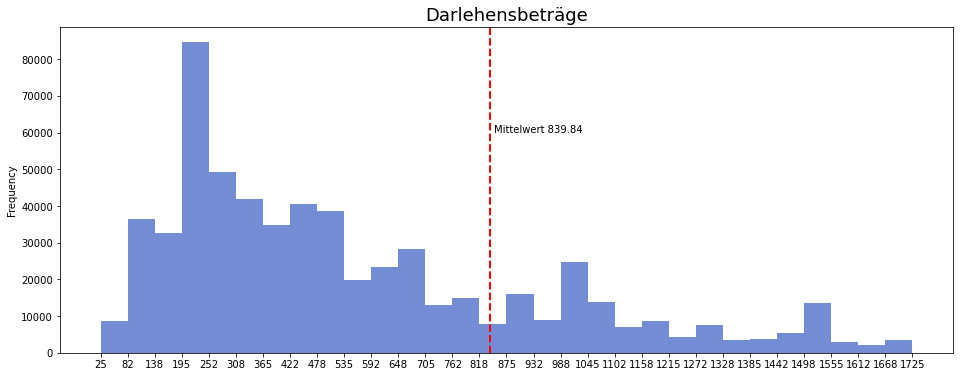

In [760]:
count,  bin_edges = np.histogram(df.loc[mask_90perc,'loan_amount'], bins=30)
fig, ax = plt.subplots()
df.loc[mask_90perc,'loan_amount'].plot(kind='hist',
                                       bins=30, 
                                       xticks=bin_edges, 
                                       figsize=(16,6), 
                                       color='#748cd4', 
                                       ax=ax)
ax.axvline(df['loan_amount'].mean(),color='red',linestyle='--', lw=2)
ax.set_title('Darlehensbeträge', fontsize=18)
ax.text(df['loan_amount'].mean()+10, 60000, f'Mittelwert {df["loan_amount"].mean():.2f}');


In den meisten Fällen liegt der beantragte Kreditbetrag **von 195 bis 252 Dollars**.<br>
Der Mittelwert  beträgt **840.12 Dollars**

<font color='red'>**Wir können unser Umzatz auf zwei Wegen erhöhen**</font>:
- den durchschnittlichen Kreditbetrag erhöhen
- die Zahl der Kredite zu erhöhen

### Vergleich der Anzahl und des Gesamtbetrags der Kredite nach Ländern

In [941]:
df_credit = df.groupby('country', as_index= False,observed=True).\
    agg(Gesamstsumme=('loan_amount','sum'), Anzahl_der_Krediten = ('loan_amount','size')).\
    sort_values(by='Gesamstsumme', ascending=False).head(20)
df_credit= df_credit.sort_values(by='Anzahl_der_Krediten', ascending=False)
df_credit['country'] = df_credit['country'].astype('string')

''

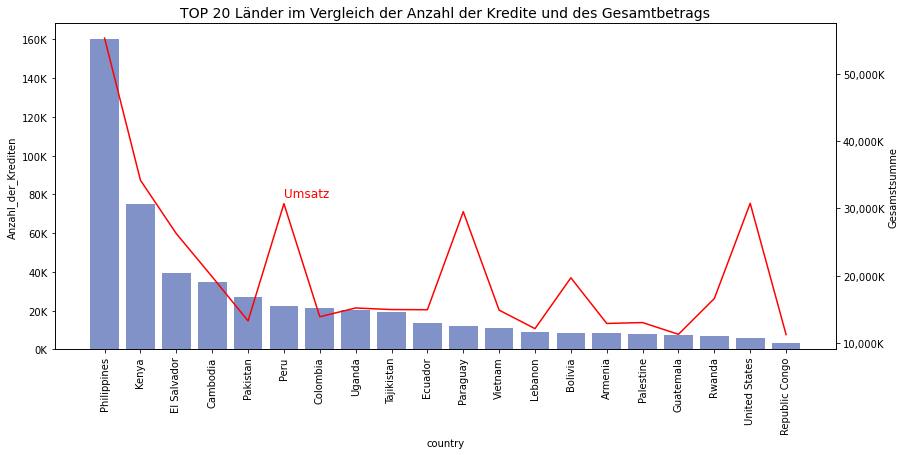

In [942]:
import warnings
warnings.filterwarnings("ignore")

fig, ax_anzahl = plt.subplots(figsize=(14,6))
g1 = sns.barplot(data=df_credit, x='country', y='Anzahl_der_Krediten', color='#748cd4', ax=ax_anzahl)
ax_umzatz = ax_anzahl.twinx()
g2 = sns.lineplot(data=df_credit, x='country', y='Gesamstsumme', color='red',ax=ax_umzatz)

ax_anzahl.tick_params(axis='x', rotation=90)

ylabel_anzahl = ['{:,.0f}'.format(x) + 'K' for x in g1.get_yticks()/1000]
g1.set_yticklabels(ylabel_anzahl)

ylabel_umsatz = ['{:,.0f}'.format(x) + 'K' for x in g2.get_yticks()/1000]
g2.set_yticklabels(ylabel_umsatz)


ax_anzahl.set_title('TOP 20 Länder im Vergleich der Anzahl der Kredite und des Gesamtbetrags', fontsize=14)
ax_umzatz.text(df_credit.loc[df_credit['country']=='Peru','country'],
               df_credit.loc[df_credit['country']=='Peru','Gesamstsumme']+1000000,
               'Umsatz', 
               fontsize=12,
               color='red')

plt.savefig('Anzahl_der_Kredite_vs_Gesamtbetrags.png')  
;

**Es ist sehr interessant, dass einige Länder uns trotz der relativ geringen Anzahl von Krediten einen anständigen Umsatz bringen.**

<font color='red'>Marketingkampagnen in den Ländern **Peru, Paraguay, Bolivia,'Rwanda' und USA** können empfohlen werden, da die Erhöhung der Kundenzahl in diesen Ländern die größte Auswirkung auf die Steigerung des Umsatzes haben wird.</font>

Für weitere Analyse erstellen wir eine liste mit diesen Ländern.

In [768]:
focus_countries = ['Peru','Paraguay', "Bolivia",'United States']
focus_countries

['Peru', 'Paraguay', 'Bolivia', 'United States']

## Für welche Zwecke werden am häufigsten Kredite aufgenommen?

In [769]:
# We use the function set to remove any redundant stopwords
stopwords = set(STOPWORDS)
stopwords.update(['buy','sell', 'pay', 'purchase','business','item','stock','items','sale','etc','pair','kg'])

In [770]:
# instantiate a word cloud object

d = getcwd()
mask = np.array(Image.open(path.join(d, "circle.png")))

use_wordcloud = WordCloud(
    background_color='white',
  #  colormap='tab20c',
    max_words=200,
    stopwords=stopwords,
    mask=mask
    )

In [771]:
focus_countries = ['Peru','Paraguay', "Bolivia",'United States']
texts_list = []

for i, elem in enumerate(focus_countries):
    name_text = elem.join('_text')
    name_text = ' '.join(df.loc[df['country']==elem,'use'])
    texts_list.append(name_text)

len(texts_list)


4

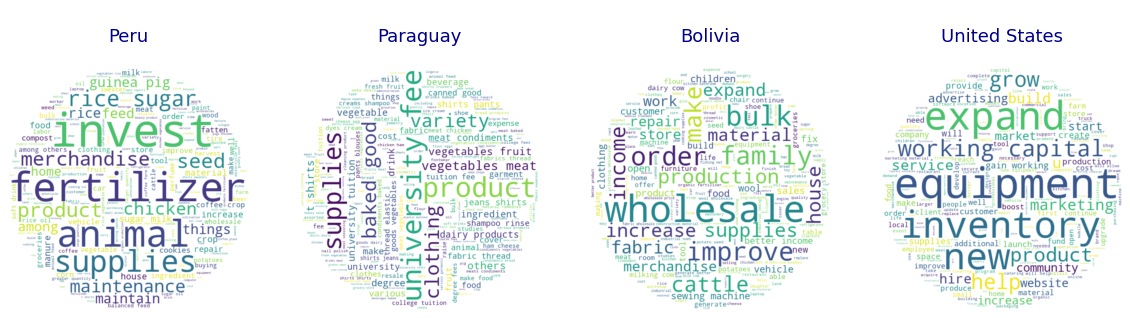

In [772]:
fig, axs = plt.subplots(1,4, figsize=(20,18)) 

for i, country in enumerate(focus_countries):
    use_wordcloud.generate(texts_list[i])
    axs[i].imshow(use_wordcloud, interpolation='bilinear')
    axs[i].set_title(f'\n{country}\n', fontsize=18, color='darkblue')
    axs[i].axis('off')

plt.savefig('word_clouds.png')    
plt.show()

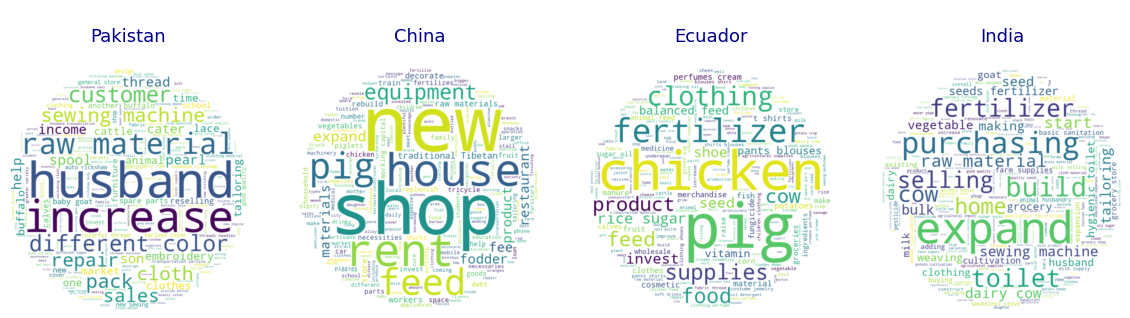

In [773]:
# zum Vergleichen

focus_countries_2 = ['Pakistan','China','Ecuador','India']

texts_list_2 = []

for i, elem in enumerate(focus_countries_2):
    name_text = elem.join('_text')
    name_text = ' '.join(df.loc[df['country']==elem,'use'])
    texts_list_2.append(name_text)

fig, axs = plt.subplots(1,4, figsize=(20,18)) 

for i, country in enumerate(focus_countries_2):
    use_wordcloud.generate(texts_list_2[i])
    axs[i].imshow(use_wordcloud, interpolation='bilinear')
    axs[i].set_title(f'\n{country}\n', fontsize=18, color='darkblue')
    axs[i].axis('off')

plt.savefig('word_clouds.png')    
plt.show()

## Fokus Länder ::

Nachdem wir nun die Fokustländer ermittelt haben, sollten wir sie genauer untersuchen.


### Verteilung der Kredite nach Sektoren

In [915]:
mask_country =df['country'].isin(focus_countries)

df_sector_focus = df.loc[mask_country,:].groupby(['sector','country','successful_loan'], as_index=False, observed=True).\
                                                        agg(anzahl_der_kredite=('loan_amount','count'),
                                                             kreditbetrag=('loan_amount','sum'))
df_sector_focus[['sector','country','successful_loan']] = df_sector_focus[['sector','country','successful_loan']].astype('string')
#df_sector_focus

In [916]:
mask_yes_credit = df_sector_focus['successful_loan'] == 'yes'
mask_no_credit = df_sector_focus['successful_loan'] == 'no'

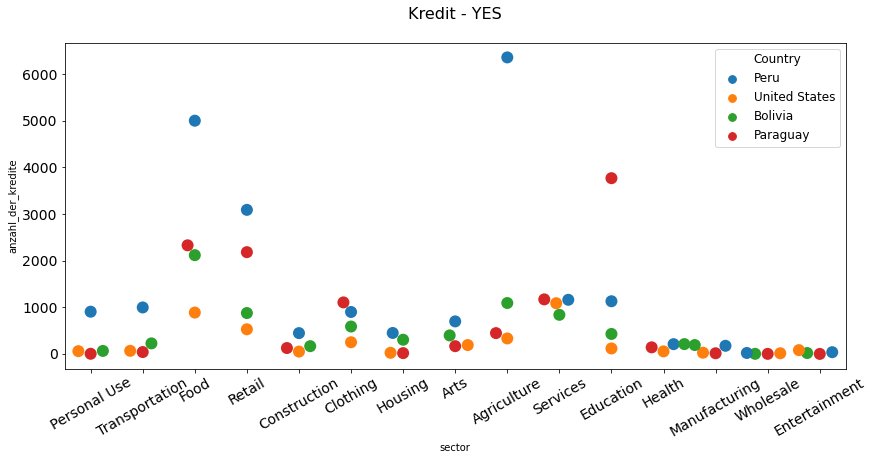

In [940]:
plt.figure(figsize=(14,6))


g= sns.swarmplot(data=df_sector_focus.loc[mask_yes_credit,:], x='sector',y='anzahl_der_kredite', hue='country',size=12)
g.set_xticklabels(labels=g.get_xticklabels(), rotation=30)
g.set_title('Kredit - YES\n ', fontsize=16)
g.legend(title='Country',title_fontsize=12,prop={"size":12}),
g.tick_params(axis='both', which='major', labelsize=14);

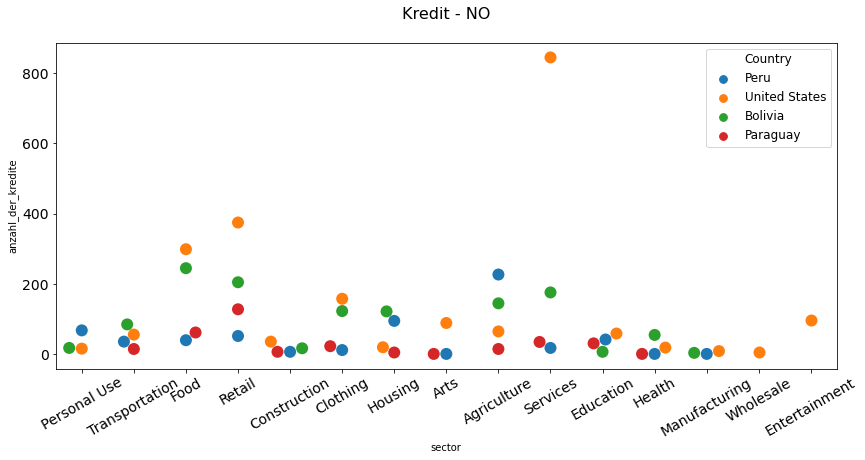

In [939]:
plt.figure(figsize=(14,6))

g= sns.swarmplot(data=df_sector_focus.loc[mask_no_credit,:], x='sector',y='anzahl_der_kredite', hue='country',size=12)
g.set_xticklabels(labels=g.get_xticklabels(), rotation=30)
g.set_title('Kredit - NO\n ', fontsize=16)
g.legend(title='Country',title_fontsize=12,prop={"size":12})
g.tick_params(axis='both', which='major', labelsize=14);

### Kreditnehmer - Gruppen oder Einzelpersonen?

In [840]:
#Vorbereitung des Datensatzes
mask_country =df['country'].isin(focus_countries)

df_borrower_count = df.loc[mask_country,:].groupby('borrower_count',as_index=False,observed=True).\
                        agg(Anzahl=('borrower_count','count')).\
                        sort_values(by='borrower_count', ascending=False)

def to_others(x,y):
    if y > 1000:
        return x
    else:
        return 'andere Gruppen'
    
df_borrower_count['gruppe'] = df_borrower_count.apply(lambda x: to_others(x['borrower_count'], x['Anzahl']), axis=1)
df_borrower_count = df_borrower_count.groupby('gruppe').agg(count=('Anzahl','sum'))
df_borrower_count


,count
gruppe,
1,34457
8,2278
9,1068
15,1110
17,1581
andere Gruppen,8186


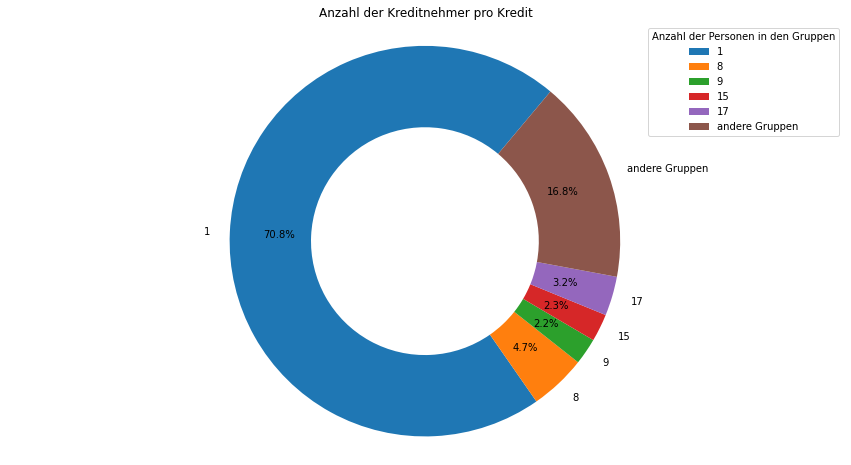

In [852]:
explode_list = [0,0.05,0.05,0.05,0.05,0.05] # ratio for each continent with which to offset each wedge.

labels =df_borrower_count.index.to_list()

fig, ax = plt.subplots(figsize=[15,8])

ax.pie(df_borrower_count['count'], 
       radius=1.2,
      # colors=colors_list, 
       labels=labels,
      # explode=explode_list,
       startangle= 50,
       pctdistance=0.75,
       autopct='%1.1f%%',
       wedgeprops=dict(width=0.5))

plt.axis('equal') 
plt.legend(labels=labels, loc='upper right', title='Anzahl der Personen in den Gruppen')
plt.ylabel('')
plt.title('Anzahl der Kreditnehmer pro Kredit');


### Geschlecht bei Krediten

Hat das Geschlecht einen Einfluss auf den Erfolg von Crowdfunding? Natürlich können Sie hier einen statistischen Test durchführen, aber Sie können den Trend auch visuell feststellen.

In [808]:
mask_gruppe = df['borrower_count']==1
df_credit = df.loc[mask_country&mask_gruppe,:].\
                    groupby(['country','successful_loan'],as_index=False, observed=True).\
                    agg(Frauen=("female_borrowers_count",'sum'), Maenner=('male_borrowers_count','sum'))

df_credit['Frauen_pro_100_Personen'] =  df_credit['Frauen'].\
                                                div(df_credit[['Frauen','Maenner']].sum(1))*100

df_credit['Maenner_pro_100_Personen'] =  df_credit['Maenner'].\
                                                div(df_credit[['Frauen','Maenner']].sum(1))*100
df_credit_melt = df_credit.melt(id_vars=['country','successful_loan'],
                               value_vars=['Frauen_pro_100_Personen','Maenner_pro_100_Personen'],
                               var_name='Gender',
                               value_name='Gender_count')
df_credit_melt[['country','successful_loan']] = df_credit_melt[['country','successful_loan']].astype('string')

mask_yes_credit = df_credit_melt['successful_loan'] == 'yes'
mask_no_credit = df_credit_melt['successful_loan'] == 'no'
#df_credit_melt

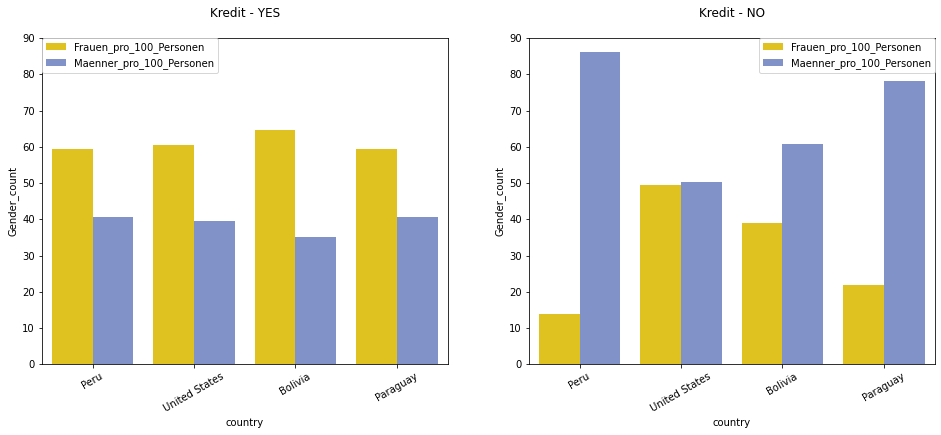

In [809]:
fig, axs = plt.subplots(1,2, figsize=(16,6))

g1 = sns.barplot(data=df_credit_melt.loc[mask_yes_credit,:], 
                 x='country', 
                 y='Gender_count', 
                 hue='Gender', 
                 palette=colors_list,
                 ax=axs[0])
g2 = sns.barplot(data=df_credit_melt.loc[mask_no_credit,:], 
                 x='country', 
                 y='Gender_count', 
                 hue='Gender', 
                 palette=colors_list,
                 ax=axs[1])

g1.set_title("Kredit - YES\n")
g1.set_xticklabels(labels=g1.get_xticklabels(), rotation=30)
g1.set_ylim(0,90)
g1.legend(loc="upper left", borderaxespad=0.)

g2.set_title("Kredit - NO\n")
g2.set_xticklabels(labels=g2.get_xticklabels(), rotation=30)
g2.set_ylim(0,90)
g2.legend(loc="upper right", borderaxespad=0.);

Frauen genießen bei Kreditgebern eindeutig mehr Vertrauen

# Aussage

Unser Geschäft konzentriert sich hauptsächlich auf Entwicklungsländer. Die Präsenz der USA in der Liste der wichtigsten Länder ist höchstwahrscheinlich auf die Tatsache zurückzuführen, dass es in diesem Land viele Auswanderer gibt, die keinen Zugang zu klassischen Kreditprogrammen haben.

Der überwiegende Anteil von Frauen unter den Auftraggebern zeigt, dass unsere Anwendung Menschen aus besonders benachteiligten Verhältnissen die Möglichkeit eröffnet, ihre Ideen zu verwirklichen und ihre Projekte schließlich finanziert zu bekommen. 

Für die Geschäftsentwicklung ist es sinnvoll, das Marketingbudget auf die Länder zu konzentrieren, die den schnellsten Return on Investment versprechen. Es handelt sich um Peru, Paraguay, Bolivien und die USA. In Peru gibt es klare Marktführer in den Segmenten Lebensmittel, Einzelhandel und Landwirtschaft. In Paraguay ist es das Bildungswesen.